In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("./Data/Cleaned_Nepali_dataset_v2.csv")
df2 = pd.read_csv("./Data/NepSa_minority_data.csv")
df1.head()

,Text,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,1


In [2]:
df2.head()

,TEXT,ASPECT_TERM,COLLECTED_BY,COLLECTOR'S_ANNOTATION,ANGEL'S_ANNOTATION
0,कमा नत झाथा तेस्को पक्षि कति स्त्रुग्ग्ले थियो...,झाथा,Angel,Profanity_0,Profanity_0
1,भान्जा रिस उठेकै हो त? कोले भन्यो हान्दिम।,हान्दिम,Angel,Violence_0,Violence_0
2,अनुहर त गतिलो त होएन मादेर्चुत,मादेर्चुत,Angel,Profanity_1,Profanity_1
3,को विकरी हो यो एस्लै नेपाल सर्कर बटा विकरी भट्...,विकरी हो,Angel,Profanity_0,Profanity_0
4,घण्टा को राजा । टेरी मा दास कमरो । अर्को चोती...,घण्टा को,Angel,Profanity_0,Profanity_1


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TEXT                    2068 non-null   object
 1   ASPECT_TERM             2068 non-null   object
 2   COLLECTED_BY            2068 non-null   object
 3   COLLECTOR'S_ANNOTATION  2068 non-null   object
 4   ANGEL'S_ANNOTATION      2068 non-null   object
dtypes: object(5)
memory usage: 80.9+ KB


In [4]:
label_map = {
    'General_0': 0,
    'General_1': 1,
    'Profanity_0': 2,
    'Profanity_1': 3,
    'Violence_0': 4,
    'Violence_1': 5
}

df2_copy = df2.copy()
df2_copy["COLLECTOR'S_ANNOTATION"] = df2_copy["COLLECTOR'S_ANNOTATION"].map(label_map).astype('int64')
df2_copy["ANGEL'S_ANNOTATION"] = df2_copy["ANGEL'S_ANNOTATION"].map(label_map).astype('int64')
df2_copy.head()

,TEXT,ASPECT_TERM,COLLECTED_BY,COLLECTOR'S_ANNOTATION,ANGEL'S_ANNOTATION
0,कमा नत झाथा तेस्को पक्षि कति स्त्रुग्ग्ले थियो...,झाथा,Angel,2,2
1,भान्जा रिस उठेकै हो त? कोले भन्यो हान्दिम।,हान्दिम,Angel,4,4
2,अनुहर त गतिलो त होएन मादेर्चुत,मादेर्चुत,Angel,3,3
3,को विकरी हो यो एस्लै नेपाल सर्कर बटा विकरी भट्...,विकरी हो,Angel,2,2
4,घण्टा को राजा । टेरी मा दास कमरो । अर्को चोती...,घण्टा को,Angel,2,3


In [5]:
print(df2.loc[:,"ANGEL'S_ANNOTATION"].value_counts())

ANGEL'S_ANNOTATION
Profanity_0    519
Violence_1     505
Violence_0     501
Profanity_1    501
General_1       36
General_0        6
Name: count, dtype: int64


## Let's calculate krippen-dorff's alpha to check the aggreement between annotators

In [6]:
import krippendorff

data_collectors = df2_copy["COLLECTOR'S_ANNOTATION"].values
main_annotator = df2_copy["ANGEL'S_ANNOTATION"].values

In [7]:
data_collectors

array([2, 4, 3, ..., 4, 4, 4])

In [8]:
main_annotator

array([2, 4, 3, ..., 4, 4, 4])

In [9]:
ratings = [data_collectors, main_annotator]
ratings_array = np.array(ratings)

In [10]:
alpha = krippendorff.alpha(reliability_data=ratings_array, level_of_measurement='nominal')
print(f"Krippendorff's Alpha: {alpha}")

Krippendorff's Alpha: 0.9244757392262265


## With an aggreement of 92.4% the data collection of minorities in NepSA has ended now we append this data to NepSA and call it NepSA++

In [11]:
df1_copy = df1.copy()
df2_copy.rename(columns={"ANGEL'S_ANNOTATION": "Target"}, inplace=True)
df2_copy.drop(labels=["ASPECT_TERM", "COLLECTED_BY", "COLLECTOR'S_ANNOTATION"], axis=1 , inplace=True)
df2_copy.head()

,TEXT,Target
0,कमा नत झाथा तेस्को पक्षि कति स्त्रुग्ग्ले थियो...,2
1,भान्जा रिस उठेकै हो त? कोले भन्यो हान्दिम।,4
2,अनुहर त गतिलो त होएन मादेर्चुत,3
3,को विकरी हो यो एस्लै नेपाल सर्कर बटा विकरी भट्...,2
4,घण्टा को राजा । टेरी मा दास कमरो । अर्को चोती...,3


In [12]:
df2_copy.rename(columns={"TEXT":"Text","TARGET": "Target"}, inplace=True)
df2_copy.head()

,Text,Target
0,कमा नत झाथा तेस्को पक्षि कति स्त्रुग्ग्ले थियो...,2
1,भान्जा रिस उठेकै हो त? कोले भन्यो हान्दिम।,4
2,अनुहर त गतिलो त होएन मादेर्चुत,3
3,को विकरी हो यो एस्लै नेपाल सर्कर बटा विकरी भट्...,2
4,घण्टा को राजा । टेरी मा दास कमरो । अर्को चोती...,3


In [13]:
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from nepali_stemmer.stemmer import NepStemmer
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load Nepali stopwords
nepali_stopwords = set(stopwords.words('nepali'))

# Initialize Nepali stemmer
nepstem = NepStemmer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ""  # Handle NaN or non-string values
    
    # Stemming
    text = nepstem.stem(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Replace Nepali sentence-ending punctuation (।) with a space
    text = re.sub(r'।', ' |', text)
    
    # Remove punctuation with a space
    text = re.sub(r'[' + re.escape(string.punctuation) + ']', ' ', text)
    
    # Remove multiple dots (……, ...), dashes (---), or similar symbols
    text = re.sub(r'[\.\-…]+', ' ', text)
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in nepali_stopwords])
    
    return text

# Apply preprocessing
df2_copy['Text'] = df2_copy['Text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/angel-
[nltk_data]     tamang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/angel-
[nltk_data]     tamang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df1_copy.head()

,Text,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,1


In [15]:
df_combined = pd.concat([df1_copy, df2_copy], ignore_index=True)
df_combined.head()

,Text,Target
0,गुठी विधेक ल्याएर ठमेल राज गुठि जग्गा छाया सेन...,0
1,दले देश सकेछन बेचे खान सुरू गरेछन दले लखेटनु पछ ।,1
2,नेपाल ससकृती ध्वस्त पार्ने योजना !,1
3,मठ मन्दिर गुम्बा जग्गा हरु भुमाफिया नजर परे हु...,1
4,नेपाल कल कर्खाना नदि नाला बेची सके मठ मन्दीर ब...,1


In [16]:
df1_copy["Target"].value_counts()

Target
1    993
0    858
2    419
5    160
4    109
3    100
Name: count, dtype: int64

In [17]:
print(df_combined["Target"].value_counts())

Target
1    1029
2     938
0     864
5     665
4     610
3     601
Name: count, dtype: int64


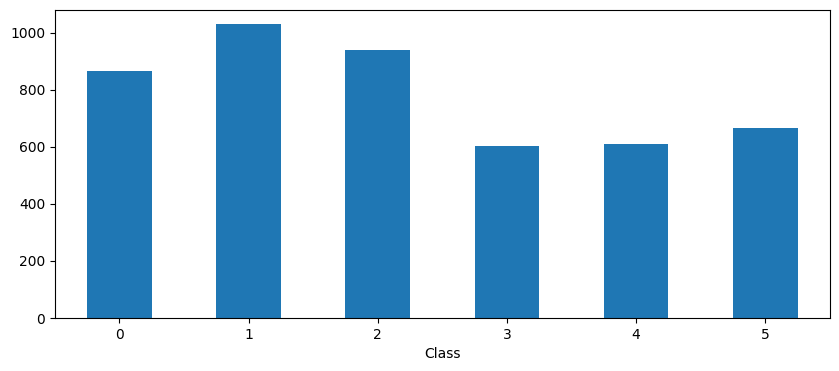

In [18]:
df_combined["Target"].value_counts().sort_index().plot(kind="bar", xlabel="Class", figsize= (10,4))

plt.xticks(rotation=0) 
plt.show()

In [19]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4707 entries, 0 to 4706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    4707 non-null   object
 1   Target  4707 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 73.7+ KB


In [20]:
df_combined.to_csv("./Data/NepSA++.csv", index=False)